In [1]:
import os
import time
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
torch.cuda.is_available()

True

In [3]:
import matplotlib.pyplot as plt

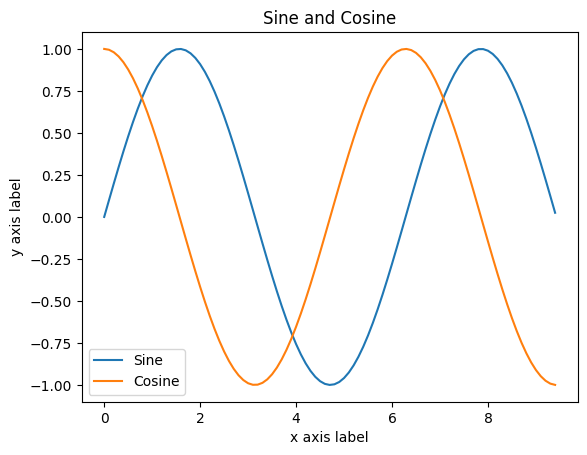

In [4]:
# Compute the x and y coordinates for points on a sine and cosine curve
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

In [7]:
data_dir = './data'

from torch.utils.data.sampler import SubsetRandomSampler
from torch.autograd import Variable
from torchvision import datasets, transforms

## USE THIS SNIPPET TO GET BINARY TRAIN/TEST DATA
# Once you have downloaded the data by setting download=True, you can
# change download=True to download=False
train_data = datasets.MNIST(data_dir, train=True, download=False,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ]))

In [17]:
subset_indices = ((train_data.targets == 8) + (train_data.targets == 9)).nonzero()
train_loader = torch.utils.data.DataLoader(train_data,batch_size=2, 
  shuffle=False,sampler=SubsetRandomSampler(subset_indices.view(-1)))

train_iter = iter(train_loader)

In [18]:
two_images, labels = next(train_iter)
labels

tensor([9, 9])

In [19]:
# View the two images
to_img = transforms.ToPILImage()
img1 = to_img(two_images[0])
img2 = to_img(two_images[1])

In [20]:
img1

In [21]:
img2

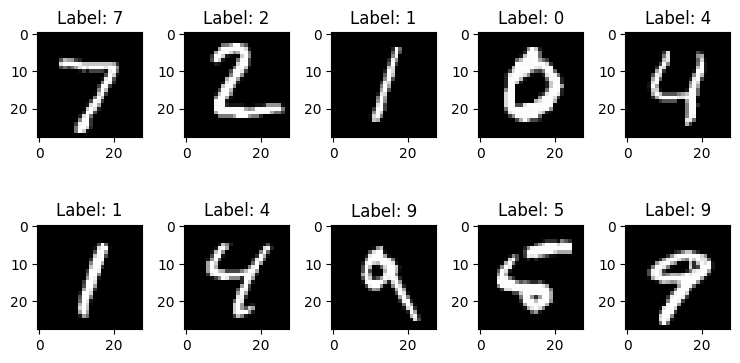

In [16]:
test_data = datasets.MNIST(data_dir, train=False, download=False,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ]))
test_loader = torch.utils.data.DataLoader(test_data,batch_size=10, 
  shuffle=False)
test_iter = iter(test_loader)

images, labels = next(test_iter)
# plot images
num_row = 2
num_col = 5
num = 10
fig, axes = plt.subplots(num_row , num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(to_img(images[i]), cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()